#Assignment 1

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [98]:
path = os.getcwd()

df=pd.read_csv(path + "/application_record.csv")

In [99]:
df = pd.DataFrame(df)

##1. Data

Credit Card Dataset is download from Kaggle. It has 438557 rows and 18 columns. There are columns of integers and strings. They contain information that bank collect from the clients that aplly for credit card.

In [100]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


##2. Clean the data

There is a "ID" column that has unique values. It is useless in my anslysis. I drop colums that I don't use.

There are strange values in columns with days so I decide to scale it to years.

In [107]:
df['AGE'] = df['DAYS_BIRTH']/(-365.0)   # each year has 365 day in my calculation
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED']/(-365.0)

In [108]:
df = df.drop(['ID','DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','FLAG_OWN_REALTY'],axis=1)

In [109]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,M,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,32.890411,12.443836
1,M,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,32.890411,12.443836
2,M,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,2.0,58.832877,3.106849
3,F,N,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,52.356164,8.358904
4,F,N,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,52.356164,8.358904


##3. Create a pie chart presenting the male/female proportion

([<matplotlib.patches.Wedge at 0x7f3cbc876fd0>,
 [Text(0.5640559336064972, 0.9443732862397701, 'Male'),
  Text(-0.5640558451878862, -0.9443733390504941, 'Female')],
 [Text(0.3076668728762712, 0.5151127015853291, '32.9%'),
  Text(-0.30766682464793793, -0.5151127303911786, '67.1%')])

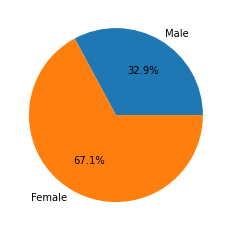

In [110]:
labels = 'Male', 'Female'

df['Male'] = df['CODE_GENDER'].map({'M': 1, 'F': 0})
df['Female'] = df['CODE_GENDER'].map({'F': 1, 'M': 0})

sizes = [df['Male'].sum(), df['Female'].sum()]
plt.pie(sizes,labels=labels, autopct='%1.1f%%')

It shows that more women apply for credit card.

##4. Create a scatterplot with the “Total income” and the “Age”, diﬀer the plot color by gender.

The data set is very large. I need to plot just part of data to have readable plot.


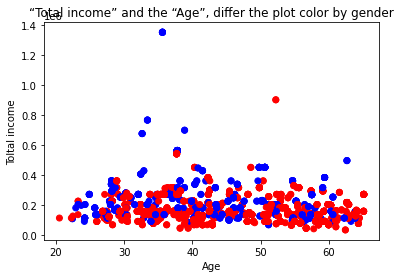

In [111]:
cols = {'F': 'red', 'M': 'blue'}  # red for women, blue for men

plt.title('“Total income” and the “Age”, diﬀer the plot color by gender')
plt.xlabel('Age')
plt.ylabel('Toltal income')
plt.scatter(df.AGE[:2000], df.AMT_INCOME_TOTAL[:2000], c=df.CODE_GENDER[:2000].map(cols))

Unfortunately the figure doesn't show any pattern according me. It is hard to interpret it.

##5. Check how many people have car.

In [112]:
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df["FLAG_OWN_CAR"].sum()

163098

##6. Create a histogram with the 'Age'.

Text(0.5, 1.0, 'Distribution of Age')

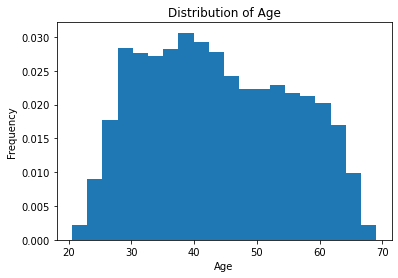

In [113]:
df['AGE'].plot.hist(bins=20,density = True)
plt.xlabel('Age')
plt.title('Distribution of Age')

The conclusion is that in age 30-45 apply for credit card more often.

##7. My questions

Who earn more? Dependence between Total Income and Type of Education.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

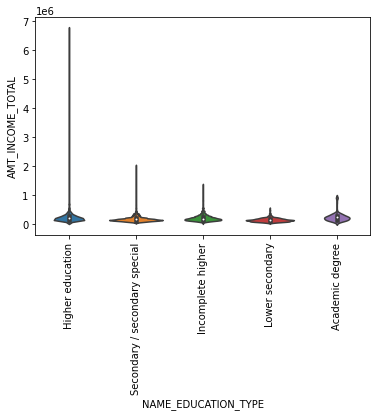

In [114]:
sns.violinplot( y=df["AMT_INCOME_TOTAL"], x=df["NAME_EDUCATION_TYPE"] )
plt.xticks(rotation='vertical')

This is violin plot. It shows distribution of each type of education type. The largest income are achieved by high educated people.

What is the number of family members?

Text(0.5, 0, 'Number of family members')

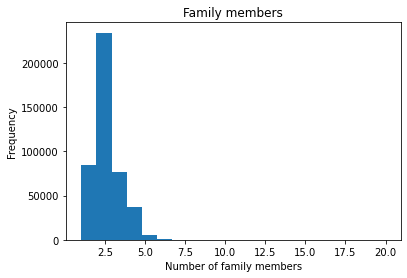

In [115]:
df["CNT_FAM_MEMBERS"].plot.hist(bins=20)
plt.title('Family members')
plt.xlabel('Number of family members')

The most popular size of family is 3 people. The values are in range from 1 to 5.

There is a problem with 'Years_Employed' column data. Logically the values should be greater than zero. For my analysis I assume that this values are equal zero.

In [127]:
for i in range(2000):
  if df["YEARS_EMPLOYED"][i]<0:
    df["YEARS_EMPLOYED"][i] = 0

Does length of service affect income?

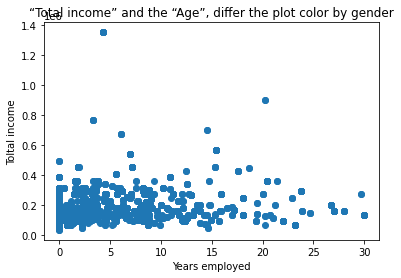

In [128]:
plt.title('“Total income” and the “Age”
plt.xlabel('Years employed')
plt.ylabel('Toltal income')
plt.scatter(df.YEARS_EMPLOYED[:2000], df.AMT_INCOME_TOTAL[:2000])

The plot does not show any relationship between seniority and income.